In [1]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-dataset/Zomato-data-.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-dataset/Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.shape

(148, 7)

In [4]:
# Any null values?
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
# Handling rate column
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Type of restaurants')

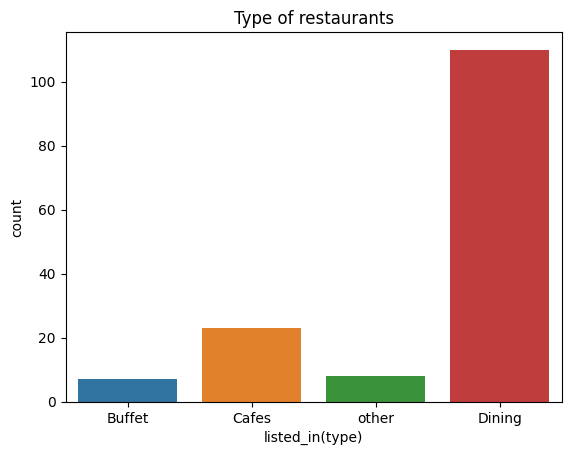

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = df['listed_in(type)'])
plt.title("Type of restaurants")

<Axes: xlabel='online_order', ylabel='count'>

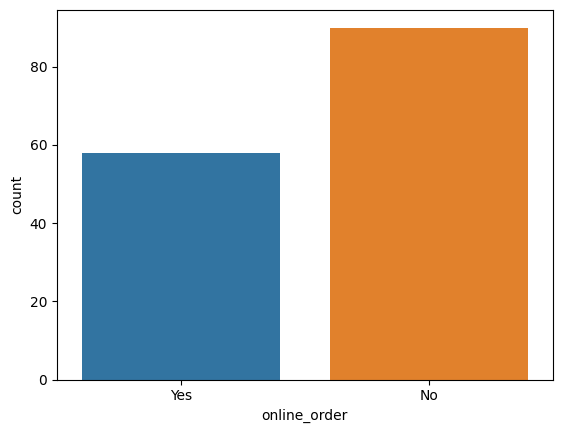

In [8]:
sns.countplot(x = df['online_order'])

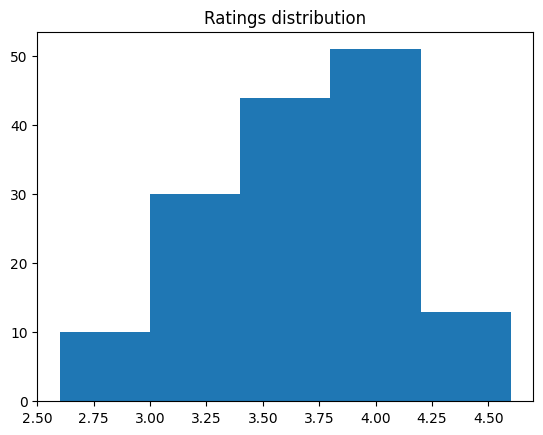

In [9]:
plt.hist(df['rate'], bins = 5)
plt.title('Ratings distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

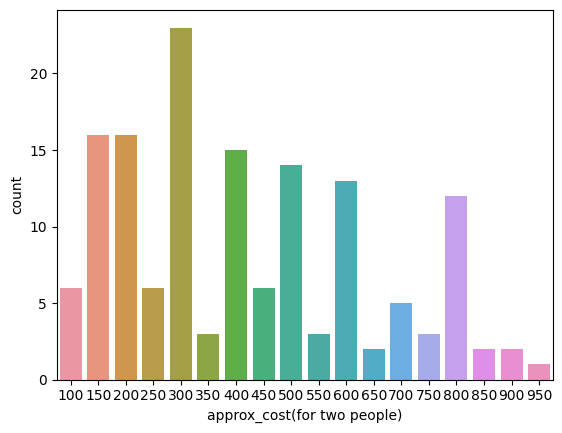

In [10]:
sns.countplot(x = df['approx_cost(for two people)'])

In [11]:
high_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == high_votes, 'name']
print(restaurant_with_max_votes, high_votes)

38    Empire Restaurant
Name: name, dtype: object 4884


In [12]:
high_rate = df['rate'].max()
restaurant_with_max_rate = df.loc[df['rate'] == high_rate, 'name']
print(restaurant_with_max_rate, high_rate)

7     Onesta
44    Onesta
Name: name, dtype: object 4.6


In [13]:
high_cost = df['approx_cost(for two people)'].max()
restaurant_with_max_cost = df.loc[df['approx_cost(for two people)'] == high_cost, 'name']
print(restaurant_with_max_cost, high_cost)

97    Ayda Persian Kitchen
Name: name, dtype: object 950
